In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [63]:
#Import necessary packages
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

# Data Cleaning

In [64]:
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
print(gender_submission.head())
print('The shape of this table is', gender_submission.shape)

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
The shape of this table is (418, 2)


In [65]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
print('The shape of this table is', test.shape)
#We do not want to examine the test set, as we want to ensure that the model that we build to predict whether a particular person on the titanic will
#survive or not, which is able to generalize well to unseen data in the test set.

The shape of this table is (418, 11)


In [66]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()
print('The shape of this table is', train.shape)

The shape of this table is (891, 12)


Let's examine which columns in this dataset have null values, as well as what categories these null values may corresspond to.

In [67]:
#Let's first drop duplicate rows

train.drop_duplicates(keep=False, inplace=True)

In [68]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

There appears to be lots of null values in the Cabin column (327), and the Age column (86). Let's examine both.

In [69]:
train[train['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Since there are so many null values, it may be appropriate to drop the Cabin column from both the train and test set.

In [70]:
train = train.drop(columns = ['Cabin'])
test = test.drop(columns = ['Cabin'])

Since there are only two null values in the embarked column, it would be appropriate to assign those null values to either 'C', 'Q', or 'S'. Let's assign it to 'S' randomly, as that is unlikely to make a large difference for two data points.

In [71]:
train.loc[train['Embarked'].isnull(), 'Embarked'] = 'S'
test.loc[test['Embarked'].isnull(), 'Embarked'] = 'S'

The age column also has null values; let's explore those further. Let's impute those values with the average age of the Age column.

In [72]:
train.loc[train['Age'].isnull(), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [73]:
train.loc[train['Age'].isnull(), 'Age'] = np.mean(train['Age'])
test.loc[test['Age'].isnull(), 'Age'] = np.mean(test['Age']) #If there happens to be any null values in the test table.

In [74]:
train.isnull().sum().sort_values(ascending = False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

# Exploratory Data Analysis

From domain knowledge, women, the young, and the elderly were rescued from the sinking ship in life boats before the men were. This creates the assumption that there may be a greater proportion of survivors that are females versus those that are male. Additionally, another assumption is that the closer the age regresses towards the average, the lower the survival rate. The survival rate is defined as the proportion of passengers that survived as a whole. It is expected to differ based on different groups within the ship.

Finally, another assumption is that those in first class are more likely to survive, and prioritized over those in second and third classes since they paid a higher fare.

**The features:**

**PassengerId:** The primary key within this table. No two records within the table have the same passenger id.

**Pclass:** Qualitative ordinal variable. Each passenger is either in class 1, class 2, and class 3. The reason why this is 
ordinal is because first class is the most expensive and luxurious, and is associated with higher fares, while second class, 
and third class are somewhat less luxurious and expensive respectively.

**Sex:** Qualitative nominal variable. The sex of the particular passenger as either male or female.

**SibSp:** Qualitative nominal variable. This defines the family relations between passengers as to whether they are a sibling or someone's spouse. 
If yes, then they are encoded with 1, else 0.

**Parch** Qualitative nominal variable. This defines family relations with respect to parent and child. If a particular passenger is someone's parent,
or someone's child, then they are encoded with 1, else they are encoded with 0.

**Fare** Quantitative continuous variable. The fare each person paid for the trip. 

**Embarked** Qualitative nominal variable. It is defined as the port of embarkation. Possible values include C, Q, or S. 


Figure 1. Barplot comparing the survival rate amongst the three classes. As the class went from (1) most luxurious to (3) least luxurious, the survival rate went down as well. This could potentially be because the crew prioritized the higher classes to escape in the life boats first.

In [75]:
grouped_pclass_survived = train[['Pclass', 'Survived']].groupby('Pclass', as_index = False).agg(np.mean)
grouped_pclass_survived

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


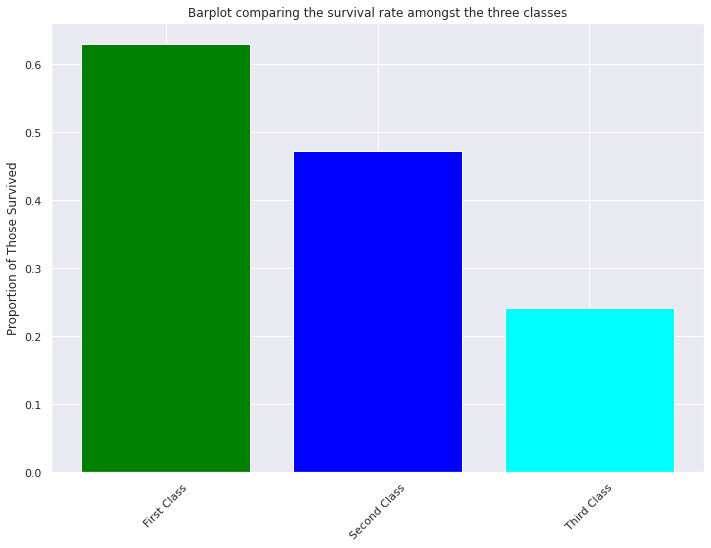

In [76]:
objects = ('First Class', 'Second Class', 'Third Class')
y_pos = np.arange(len(objects))
performance = [grouped_pclass_survived['Survived'].iloc[0], grouped_pclass_survived['Survived'].iloc[1], grouped_pclass_survived['Survived'].iloc[2]]
plt.bar(y_pos, performance, align='center', alpha=1, color=['green', 'blue', 'cyan']) 
plt.xticks(y_pos, objects)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation= 45)
plt.ylabel('Proportion of Those Survived')
plt.title('Barplot comparing the survival rate amongst the three classes')
plt.show()

**Figure 2**. As expected, first class paid significantly more in their fare in comparison to second class, and third class respectively.

In [77]:
grouped_pclass_fare = train[['Pclass', 'Fare']].groupby('Pclass', as_index = False).agg(np.mean)
grouped_pclass_fare

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


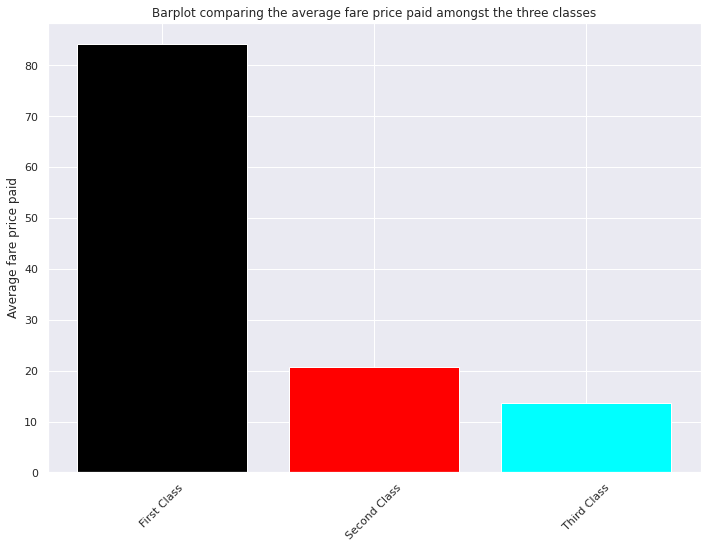

In [78]:
objects = ('First Class', 'Second Class', 'Third Class')
y_pos = np.arange(len(objects))
performance = [grouped_pclass_fare['Fare'].iloc[0], grouped_pclass_fare['Fare'].iloc[1], grouped_pclass_fare['Fare'].iloc[2]]
plt.bar(y_pos, performance, align='center', alpha=1, color=['black', 'red', 'cyan']) 
plt.xticks(y_pos, objects)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation= 45)
plt.ylabel('Average fare price paid')
plt.title('Barplot comparing the average fare price paid amongst the three classes')
plt.show()

**Figure 3**. The spread of fares appears to be much more larger for first class amongst both males and females. As the class goes from first class to third class, the variability in the fares amongst the passengers decreases. 

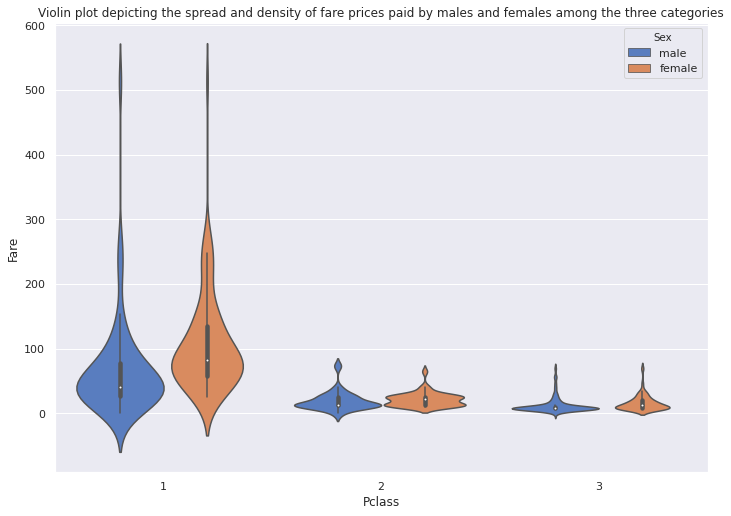

In [79]:
sns.violinplot(x="Pclass", y="Fare", hue="Sex", data=train, palette="muted")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('Violin plot depicting the spread and density of fare prices paid by males and females among the three categories')
plt.show()

In [80]:
grouped_embarked = train[['Embarked', 'Fare']].groupby('Embarked', as_index = False).agg(np.mean).sort_values('Fare', ascending = False)
grouped_embarked

,Embarked,Fare
0,C,59.954144
2,S,27.243651
1,Q,13.276030


**Figure 4**. It appears to be that those embarking from Cherbourg paid a higher fee for the fare on average****, followed by Southampton, and Queenstown.

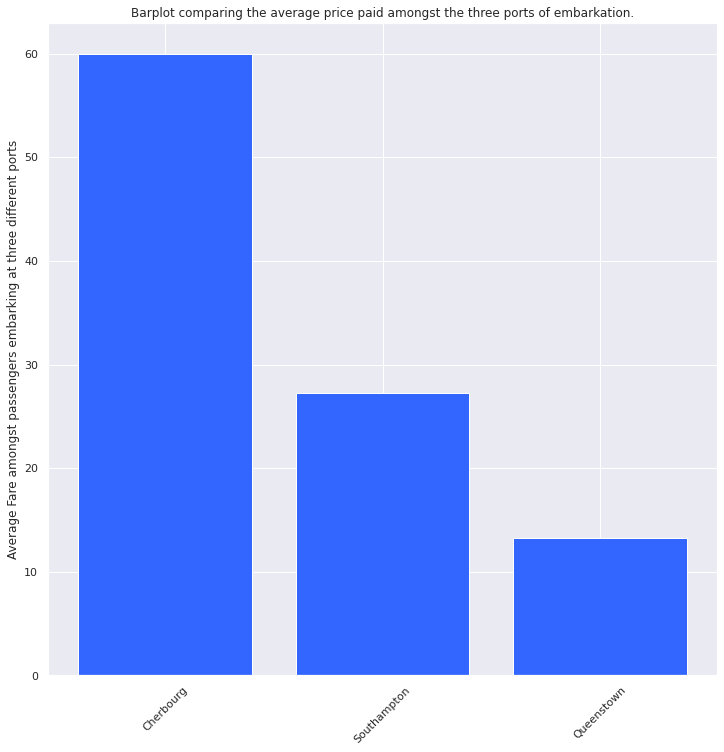

In [20]:
objects = ('Cherbourg', 'Southampton', 'Queenstown')
y_pos = np.arange(len(objects))
performance = [grouped_embarked['Fare'].iloc[0], grouped_embarked['Fare'].iloc[1], grouped_embarked['Fare'].iloc[2]]
plt.bar(y_pos, performance, align='center', alpha=1, color=(0.2, 0.4, 1)) 
plt.xticks(y_pos, objects)
plt.xticks(rotation= 45)
plt.ylabel('Average Fare amongst passengers embarking at three different ports')
plt.title('Barplot comparing the average price paid amongst the three ports of embarkation.')
plt.show()

Let's perform one hot encoding on the categorical variables.

Let's examine the names of the passengers. Additionally, let's create a feature called the length of the names.

In [21]:
train[train['Pclass'] == 1].head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.000000,0,0,PC 17601,27.7208,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,S


In [22]:
train[train['Pclass'] == 2].head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000000,0,0,248706,16.0000,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.000000,0,0,239865,26.0000,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.000000,1,0,11668,21.0000,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.000000,1,2,SC/Paris 2123,41.5792,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.000000,1,0,2926,26.0000,S
56,57,1,2,"Rugg, Miss. Emily",female,21.000000,0,0,C.A. 31026,10.5000,S


In [23]:
train[train['Pclass'] == 3].head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000000,0,0,A/5. 2151,8.0500,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000000,0,0,350406,7.8542,S


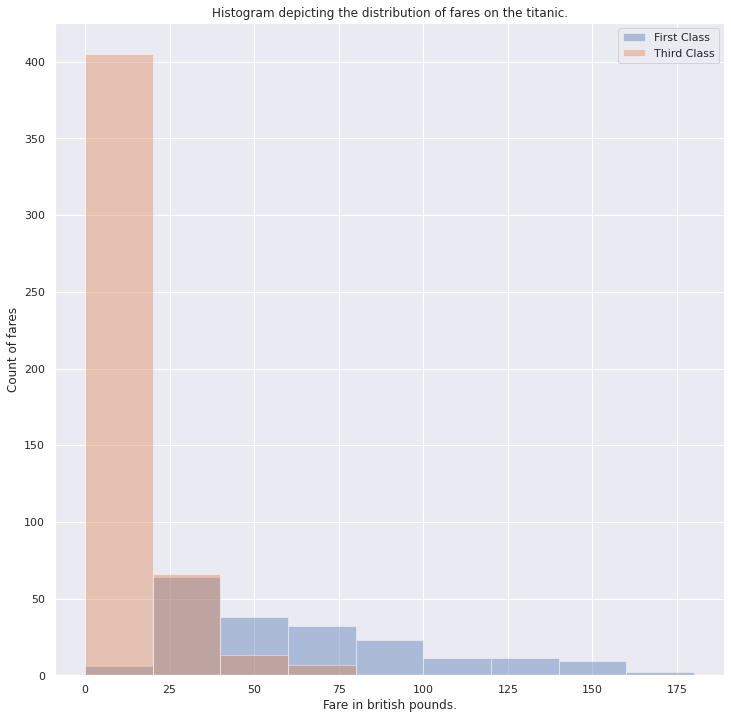

In [24]:
sns.distplot(train.loc[train['Pclass'] == 1, 'Fare'], kde = False, hist = True, bins = np.arange(0, 200, 20), label = 'First Class')
sns.distplot(train.loc[train['Pclass'] == 3, 'Fare'], kde = False, hist = True, bins = np.arange(0, 200, 20), label = 'Third Class')
plt.xlabel('Fare in british pounds.')
plt.ylabel('Count of fares')
plt.title('Histogram depicting the distribution of fares on the titanic.')
plt.legend()
plt.show()

In [81]:
train['Name Length'] = train['Name'].apply(len)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name Length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,24


In [82]:
test['Name Length'] = test['Name'].apply(len)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name Length
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,16
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,32
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,25
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,16
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,44


In [83]:
train[['Pclass', 'Name Length']].groupby('Pclass', as_index = False).agg(np.mean)

,Pclass,Name Length
0,1,29.949074
1,2,28.217391
2,3,25.183299


It appears to be that passengers with longer names tend to be in higher passenger classes.

In [84]:
train[['Survived', 'Name Length']].groupby('Survived', as_index = False).agg(np.mean)

,Survived,Name Length
0,0,24.531876
1,1,30.871345


Additionally, the average name length of those who survived is considerably larger(in characters) than the average name length of those who did not survive.

In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name Length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,24


Let's now examine the titles of the names themselves.

In [86]:
def encode_title(row):
    if 'Mr.' in row:
        return 'Mr.'
    elif 'Miss.' in row:
        return 'Miss.'
    elif 'Mrs.' in row:
        return 'Mrs'
    elif 'Master' in row:
        return 'Master'
    elif 'Dr.' in row:
        return 'Dr.'
    else:
        return 'No Title'

train['Name Title'] = train['Name'].apply(encode_title)
test['Name Title'] = test['Name'].apply(encode_title)

In [87]:
train['Name Title']

0           Mr.
1           Mrs
2         Miss.
3           Mrs
4           Mr.
         ...   
886    No Title
887       Miss.
888       Miss.
889         Mr.
890         Mr.
Name: Name Title, Length: 891, dtype: object

In [88]:
train = train.drop(columns = ['Name'])
test = test.drop(columns = ['Name'])

In [89]:
test.isnull().sum().sort_values(ascending = False)
test.loc[test['Fare'].isnull(), 'Fare'] = np.mean(test['Fare'])

In [90]:
test.isnull().sum().sort_values(ascending = False)

Name Title     0
Name Length    0
Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Pclass         0
PassengerId    0
dtype: int64

Let's now examine the tickets. How are they stratified by class, gender etc?

In [91]:
train.loc[train['Pclass'] == 1, 'Ticket'].head(60)

1         PC 17599
3           113803
6            17463
11          113783
23          113788
27           19950
30        PC 17601
31        PC 17569
34        PC 17604
35          113789
52        PC 17572
54          113509
55           19947
61          113572
62           36973
64        PC 17605
83          113059
88           19950
92     W.E.P. 5734
96        PC 17754
97        PC 17759
102          35281
110         110465
118       PC 17558
124          35281
136          11752
137         113803
139       PC 17593
151         113776
155       PC 17597
166         113505
168       PC 17318
170         111240
174          17764
177       PC 17595
185         113767
187         111428
194       PC 17610
195       PC 17569
209         112277
215          35273
218          11813
224          19943
230          36973
245          19928
248          11751
252         113514
256       PC 17585
257         110152
258       PC 17755
262         110413
263         112059
268       PC

In [92]:
train.loc[train['Pclass'] == 2, 'Ticket'].head(60)

9             237736
15            248706
17            244373
20            239865
21            248698
33        C.A. 24579
41             11668
43     SC/Paris 2123
53              2926
56        C.A. 31026
58        C.A. 34651
66        C.A. 29395
70        C.A. 33111
72      S.O.C. 14879
78            248738
84        SO/C 14885
98            231919
99            244367
117            11668
120     S.O.C. 14879
122           237736
123            27267
133           228414
134       C.A. 29178
135    SC/PARIS 2133
144           231945
145       C.A. 33112
148           230080
149           244310
150      S.O.P. 1166
161       C.A. 33595
178           250653
181    SC/PARIS 2131
183           230136
190           234604
191            28424
193           230080
199           248747
211     F.C.C. 13528
213           250646
217           243847
219        W/C 14208
221           220367
226        SW/PP 751
228           236171
232           237442
234       C.A. 29566
236          

In [93]:
train.loc[train['Pclass'] == 3, 'Ticket'].head(60)

0            A/5 21171
2     STON/O2. 3101282
4               373450
5               330877
7               349909
8               347742
10             PP 9549
12           A/5. 2151
13              347082
14              350406
16              382652
18              345763
19                2649
22              330923
24              349909
25              347077
26                2631
28              330959
29              349216
32              335677
36                2677
37          A./5. 2152
38              345764
39                2651
40                7546
42              349253
44              330958
45     S.C./A.4. 23567
46              370371
47               14311
48                2662
49              349237
50             3101295
51          A/4. 39886
57                2697
59             CA 2144
60                2669
63              347088
65                2661
67           S.P. 3464
68             3101281
69              315151
71             CA 2144
73         

In [94]:
train = train.drop(columns = ['Ticket'])
test = test.drop(columns = ['Ticket'])

In [95]:
# #Let's first convert the Pclass column to categorical variables.
def convert_pclass(row):
    if row == 1:
        return 'First Class'
    elif row == 2:
        return 'Second Class'
    elif row == 3:
        return 'Third Class'
        
def feature_pipeline_train(table):
    y = table['Survived']
    X = table.drop(columns = ['PassengerId', 'Survived'])
    return X, y

def feature_pipeline_test(table):
    X = table.drop(columns = ['PassengerId'])
    return X

train['Pclass'] = train['Pclass'].apply(convert_pclass)
train = pd.get_dummies(train)

test['Pclass'] = test['Pclass'].apply(convert_pclass)
test = pd.get_dummies(test)
       
X_train, y_train = feature_pipeline_train(train)
X_test = feature_pipeline_test(test)
X_train.head()

,Age,SibSp,Parch,Fare,Name Length,Pclass_First Class,Pclass_Second Class,Pclass_Third Class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name Title_Dr.,Name Title_Master,Name Title_Miss.,Name Title_Mr.,Name Title_Mrs,Name Title_No Title
0,22.0,1,0,7.2500,23,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,38.0,1,0,71.2833,51,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,26.0,0,0,7.9250,22,0,0,1,1,0,0,0,1,0,0,1,0,0,0
3,35.0,1,0,53.1000,44,1,0,0,1,0,0,0,1,0,0,0,0,1,0
4,35.0,0,0,8.0500,24,0,0,1,0,1,0,0,1,0,0,0,1,0,0


In [96]:
print(len(list(X_train.columns)))
print(len(list(X_test.columns)))

19
19


In [97]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

PCA to preserve the principal components that capture majority of the variance of the data.

In [98]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=19)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[2.22446234e-01 1.35624991e-01 1.13457154e-01 9.62271607e-02
 7.33560860e-02 6.60706810e-02 5.66380923e-02 5.36445847e-02
 4.75146365e-02 3.92743851e-02 2.95513581e-02 2.67845602e-02
 2.09500988e-02 1.73371466e-02 1.12283069e-03 4.34885161e-33
 2.69379992e-33 7.08958848e-34 2.18520355e-34]
[6.13660517e+01 4.79165469e+01 4.38259759e+01 4.03612389e+01
 3.52398238e+01 3.34441409e+01 3.09649199e+01 3.01355135e+01
 2.83615106e+01 2.57851908e+01 2.23668268e+01 2.12940325e+01
 1.88325310e+01 1.71318579e+01 4.35986247e+00 8.58030937e-15
 6.75302442e-15 3.46438513e-15 1.92336452e-15]


# Model Development

1. Let's build a KNN(K nearest neighbors algorithm)

In [99]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train, y_train)
neigh.score(X_train, y_train)

0.8462401795735129

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
cval_accuracies = []
for i in range(50):
    neigh = KNeighborsClassifier(n_neighbors=i+1)
    neigh.fit(X_train, y_train)
    cval_accuracies.append(np.mean(cross_val_score(neigh, X_train, y_train, cv=5)))
print(cval_accuracies.index(max(cval_accuracies)))

7


In [101]:
training_scores = cross_val_score(neigh, X_train, y_train, cv=5)
print(training_scores)

average_cv_training1 = np.mean(training_scores)
print(average_cv_training1)

[0.75977654 0.82022472 0.81460674 0.76404494 0.83146067]
0.7980227229929069


2. Logistic Regression Classifier

In [102]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, penalty = 'none').fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.8327721661054994


In [103]:
training_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(training_scores)

average_cv_training2 = np.mean(training_scores)
print(average_cv_training2)

[0.82681564 0.80337079 0.79775281 0.79775281 0.86516854]
0.818172117255665


3. Decision Tree Classifier

In [104]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))

0.9966329966329966


In [105]:
training_scores = cross_val_score(dt, X_train, y_train, cv=5)
print(training_scores)

average_cv_training3 = np.mean(training_scores)
print(average_cv_training3)

[0.69273743 0.74719101 0.75280899 0.78089888 0.73033708]
0.7407946770447555


4. Random Forest Ensemble Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier as RFC #Combining multiple weak learners(multiple decision trees) to make a strong learner(wisdom of the crowd)
rfc_b = RFC(max_depth = 47)
rfc_b.fit(X_train, y_train)
y_pred = rfc_b.score(X_train, y_train)
y_pred

0.9966329966329966

In [106]:
#Let's create a mini validation set based on the training set.
from sklearn.model_selection import train_test_split
Xtrain, X_val, ytrain, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
print(len(Xtrain[1, :]))
print(len(X_val[1, :]))
print(len(y_val))
print(len(ytrain))

19
19
295
596


In [52]:
scores = []
for i in range(13):
    training = Xtrain[:, 0:i+1]
    validation = X_val[:, 0:i+1]
    rfc_b = RFC(max_depth = 47)
    rfc_b.fit(training, ytrain)
    y_pred = rfc_b.score(validation, y_val)
    scores.append(y_pred)
print("The max score is", max(scores))
print(scores.index(max(scores)))
print(scores)

The max score is 0.8169491525423729
10
[0.5525423728813559, 0.5796610169491525, 0.6440677966101694, 0.6440677966101694, 0.7016949152542373, 0.7016949152542373, 0.7220338983050848, 0.7322033898305085, 0.8, 0.7898305084745763, 0.8169491525423729, 0.8169491525423729, 0.8033898305084746]


In [108]:
# #Max depth
cval_accuracies = []
for i in range(50):
    rfc_b = RFC(max_depth = i + 1)
    rfc_b.fit(X_train, y_train)
    cval_accuracies.append(list(cross_val_score(rfc_b, X_train, y_train, cv=5)))
print(cval_accuracies.index(max(cval_accuracies)))


In [54]:
training_scores = cross_val_score(rfc_b, X_train[:, 0:10], y_train, cv=5)
print(training_scores)

average_cv_training4 = np.mean(training_scores)
print(average_cv_training4)

[0.79329609 0.82022472 0.83707865 0.79213483 0.8258427 ]
0.8137153976523759


In [55]:
test.isnull().sum().sort_values(ascending = False)
X_test

array([[ 0.3349926 , -0.49947002, -0.4002477 , ...,  0.86120071,
        -0.45617155, -0.1206777 ],
       [ 1.32553003,  0.61699237, -0.4002477 , ..., -1.1611695 ,
         2.19215774, -0.1206777 ],
       [ 2.51417495, -0.49947002, -0.4002477 , ...,  0.86120071,
        -0.45617155, -0.1206777 ],
       ...,
       [ 0.65196458, -0.49947002, -0.4002477 , ...,  0.86120071,
        -0.45617155, -0.1206777 ],
       [ 0.        , -0.49947002, -0.4002477 , ...,  0.86120071,
        -0.45617155, -0.1206777 ],
       [ 0.        ,  0.61699237,  0.61989583, ..., -1.1611695 ,
        -0.45617155, -0.1206777 ]])

In [56]:
lr.fit(X_train, y_train)
logistic_regression_predictions = lr.predict(X_test)
test['Survived'] = logistic_regression_predictions
final_table_2 = test[['PassengerId', 'Survived']]
final_table_2.to_csv('/kaggle/working/final_table_8.csv', index = False)